<a name="section-one"></a>
# **Importing Libraries**

In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\uniat\.cache\kagglehub\datasets\abcsds\pokemon\versions\2


In [3]:
df_orginal = pd.read_csv(path+"//Pokemon.csv")
df = df_orginal.copy()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<a name="section-two"></a>
# **EDA (Exploratory Data Analysis)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (800, 13)
Size      : 10400
Dimension : 2


In [6]:
print(f'Total duplicated: {sum(df.duplicated())}')

Total duplicated: 0


In [7]:
print(pd.concat([df.isnull().sum(), df.isnull().sum()/len(df)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

            Number of Missing Values  Ratio of Missing Values
#                                  0                     0.00
Name                               0                     0.00
Type 1                             0                     0.00
Type 2                           386                    48.25
Total                              0                     0.00
HP                                 0                     0.00
Attack                             0                     0.00
Defense                            0                     0.00
Sp. Atk                            0                     0.00
Sp. Def                            0                     0.00
Speed                              0                     0.00
Generation                         0                     0.00
Legendary                          0                     0.00


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.00,362.81,208.34,1.00,184.75,364.50,539.25,721.00
Total,800.00,435.10,119.96,180.00,330.00,450.00,515.00,780.00
HP,800.00,69.26,25.53,1.00,50.00,65.00,80.00,255.00
Attack,800.00,79.00,32.46,5.00,55.00,75.00,100.00,190.00
Defense,800.00,73.84,31.18,5.00,50.00,70.00,90.00,230.00
Sp. Atk,800.00,72.82,32.72,10.00,49.75,65.00,95.00,194.00
Sp. Def,800.00,71.90,27.83,20.00,50.00,70.00,90.00,230.00
Speed,800.00,68.28,29.06,5.00,45.00,65.00,90.00,180.00
Generation,800.00,3.32,1.66,1.00,2.00,3.00,5.00,6.00


In [9]:
# Displaying the correlation matrix of numeric columns
df.corr(numeric_only=True).style.background_gradient()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<a name="section-three"></a>
# **Data Cleaning & Reduction**


In [10]:
df.rename(columns={'#':'ID',
                   'Sp. Atk': 'Special Attack',
                   'Sp. Def': 'Special Defense'}, inplace=True)

df.columns = [x.replace(" ", "_").lower() for x in df.columns]

In [11]:
df['type_2'] = df['type_2'].replace(np.nan, "No_2nd_Type")

In [12]:
# In further steps "name" and "total" variables will also be dropped.
df.drop(['id'], axis=1, inplace=True)

# **Feature Extraction**

In [13]:
df['is_dual_type'] = df['type_2'].apply(lambda x: '0' if x=='No_2nd_Type' else '1')

In [14]:
df['full_type'] = df['type_1'] + " - " + df['type_2']

# **Visualization**

<a name="section-v-one"></a>
### **Minumum and Maximum Skilled Pokemons**

In [15]:
skills = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

max_skills_id = []
min_skills_id = []

for skill in skills:
  max_skills_id.append(df.loc[df[skill].idxmax()].name)
  min_skills_id.append(df.loc[df[skill].idxmin()].name)

print("Highlighting the minimum values for each skill")
df.iloc[min_skills_id,:].drop_duplicates().style.highlight_min(subset=skills, color = 'red')

Highlighting the minimum values for each skill


,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary,is_dual_type,full_type
316,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,1,Bug - Ghost
121,Chansey,Normal,No_2nd_Type,450,250,5,5,35,105,50,1,False,0,Normal - No_2nd_Type
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,1,Bug - Rock
13,Caterpie,Bug,No_2nd_Type,195,45,30,35,20,20,45,1,False,0,Bug - No_2nd_Type


In [16]:
print("Highlighting the Maximum values for each skill")
df.iloc[max_skills_id,:].style.highlight_max(subset=skills, color = 'lightgreen')

Highlighting the Maximum values for each skill


,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary,is_dual_type,full_type
261,Blissey,Normal,No_2nd_Type,540,255,10,10,75,135,55,2,False,0,Normal - No_2nd_Type
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,1,Psychic - Fighting
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,1,Steel - Ground
164,MewtwoMega Mewtwo Y,Psychic,No_2nd_Type,780,106,150,70,194,120,140,1,True,0,Psychic - No_2nd_Type
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,1,Bug - Rock
431,DeoxysSpeed Forme,Psychic,No_2nd_Type,600,50,95,90,95,90,180,3,True,0,Psychic - No_2nd_Type


<a name="section-v-two"></a>
### **Average Scores for each Generation**

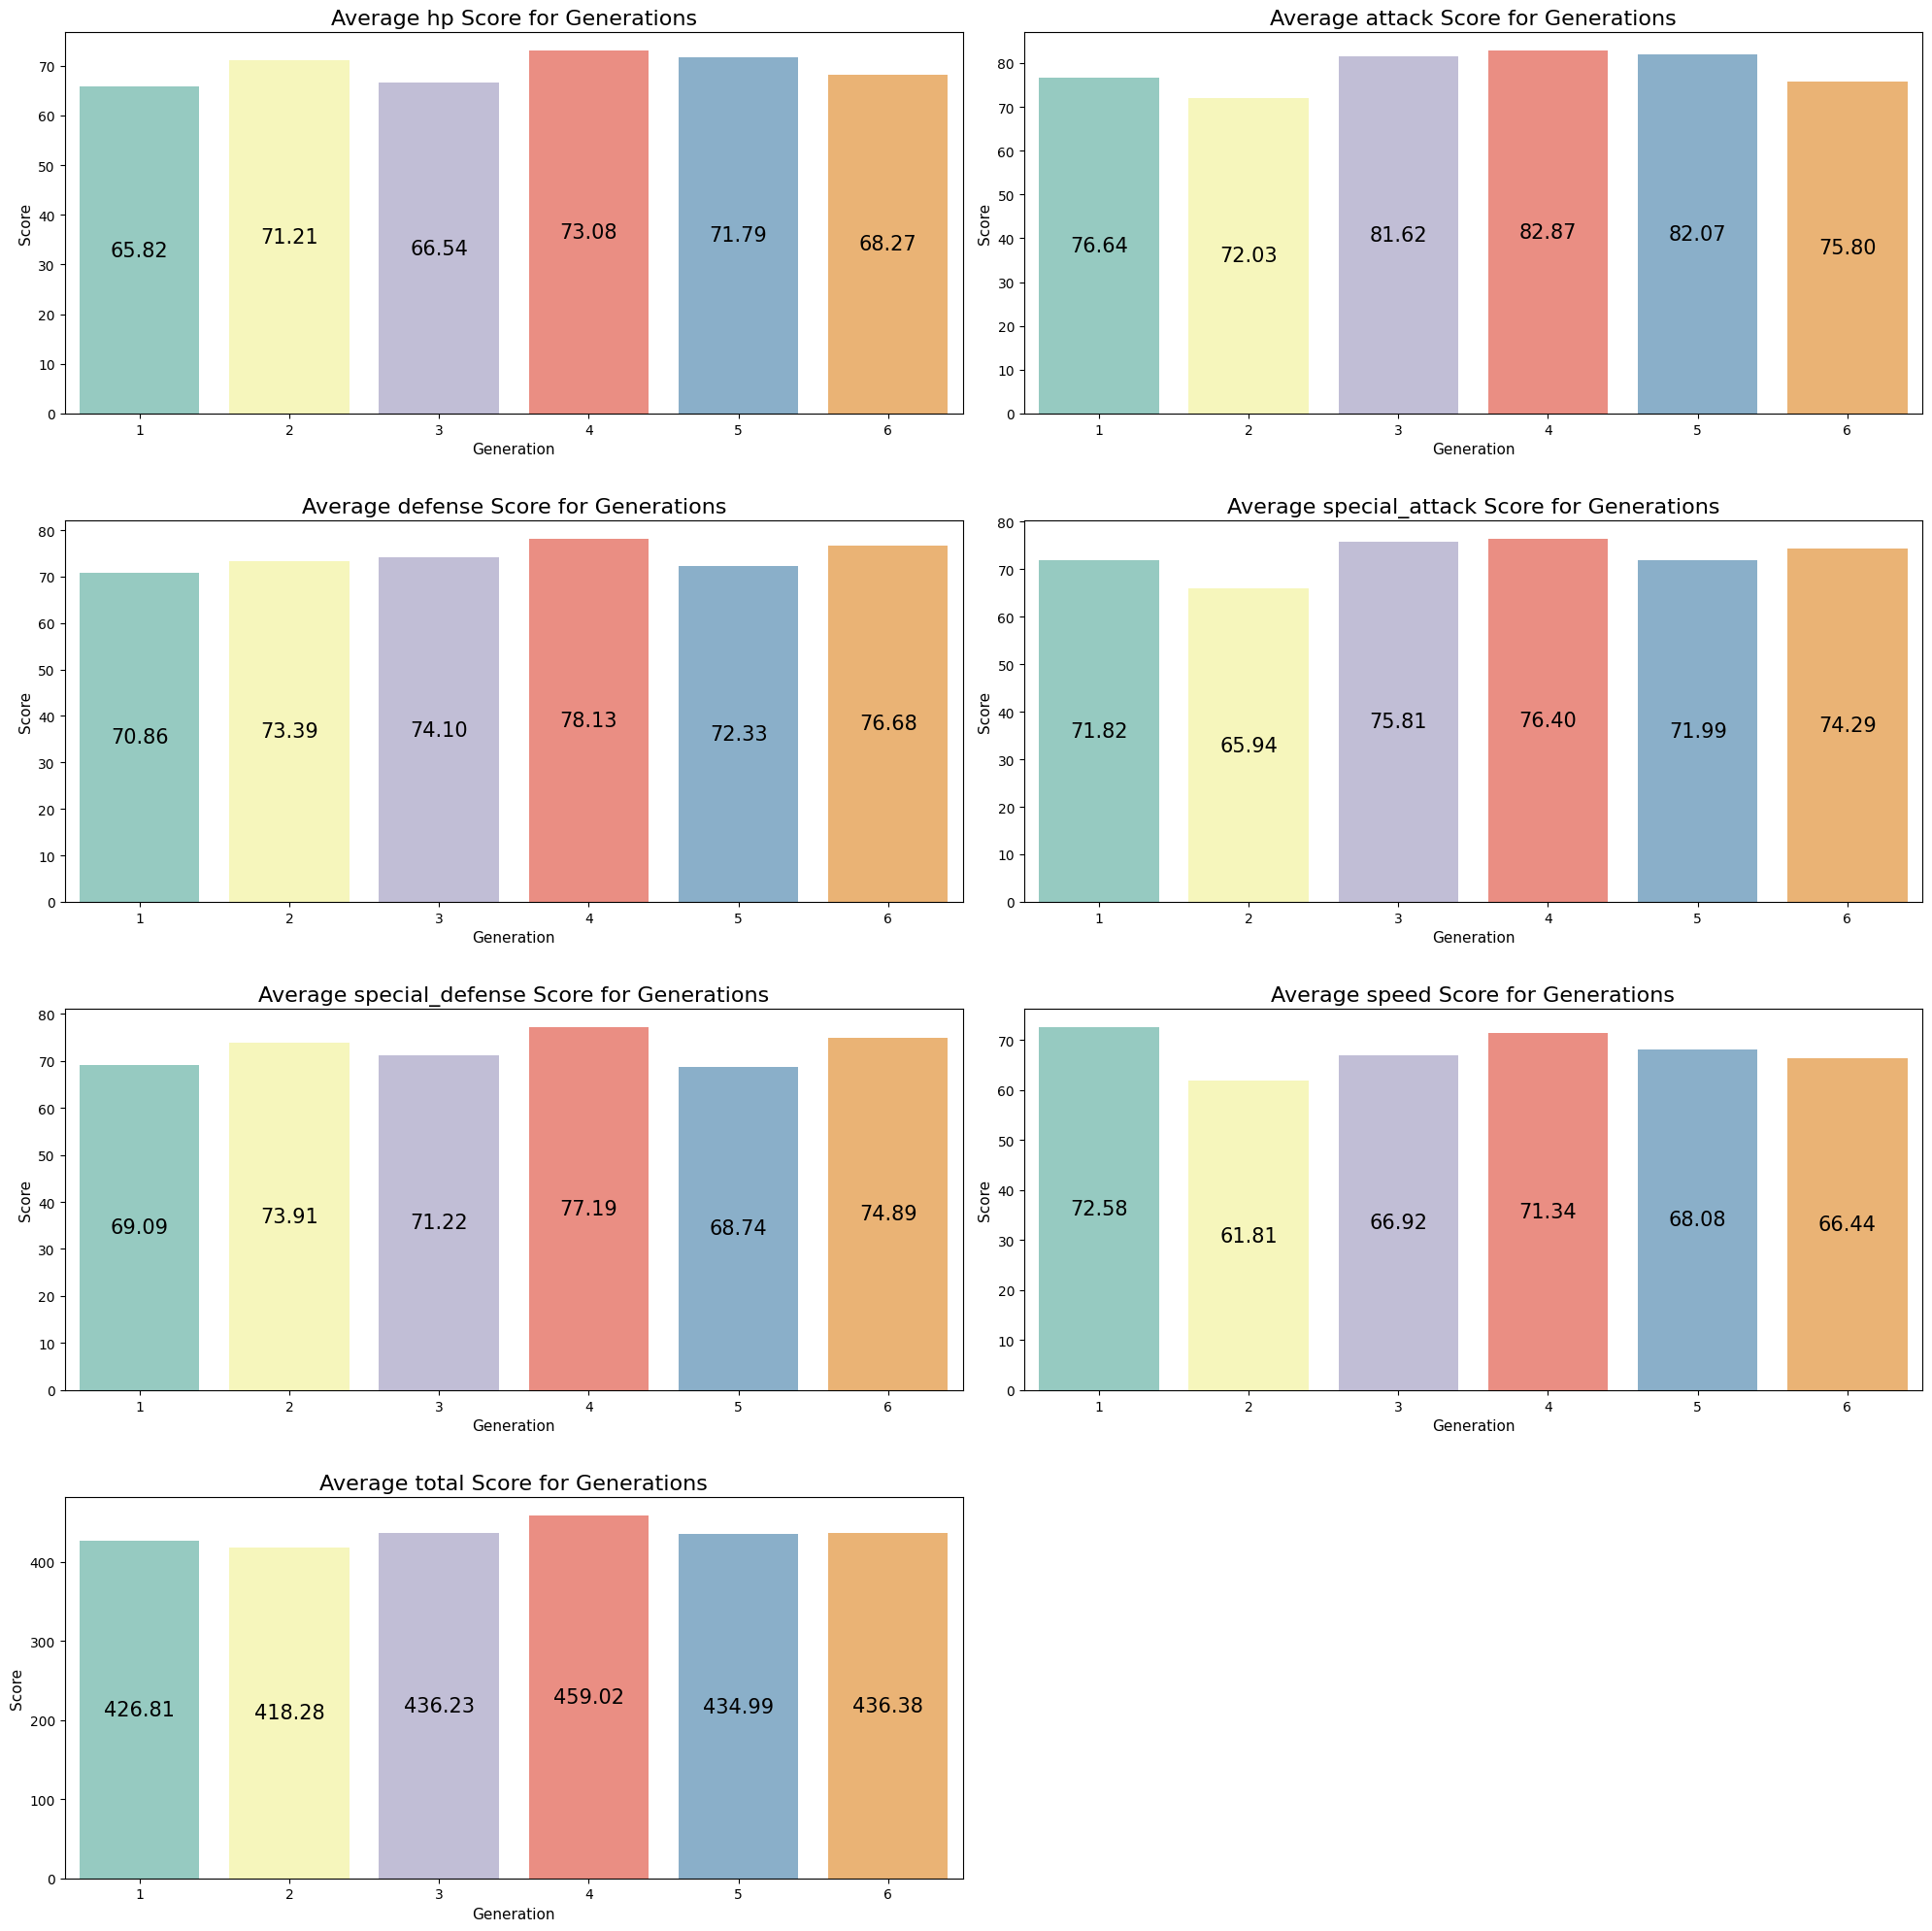

In [17]:
skills = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total']

n_cols = 2
n_rows = (len(skills) - 1) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20, 20))
axs = axs.flatten()

for n, skill in enumerate(skills):
    ax = sns.barplot(x = df.groupby(['generation'])[skill].mean().index,
                     y = df.groupby(['generation'])[skill].mean().values,
                     ax=axs[n],
                     palette='Set3')

    axs[n].set_title(f"Average {skill} Score for Generations", fontsize=16)
    axs[n].set_xlabel("Generation", fontsize=11)
    ax.set_ylabel(f'Score', fontsize=11)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=15, label_type='center')

    if not axs.flat[-1].lines:
        axs.flat[-1].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

<a name="section-v-three"></a>
### **Skill Distributions**

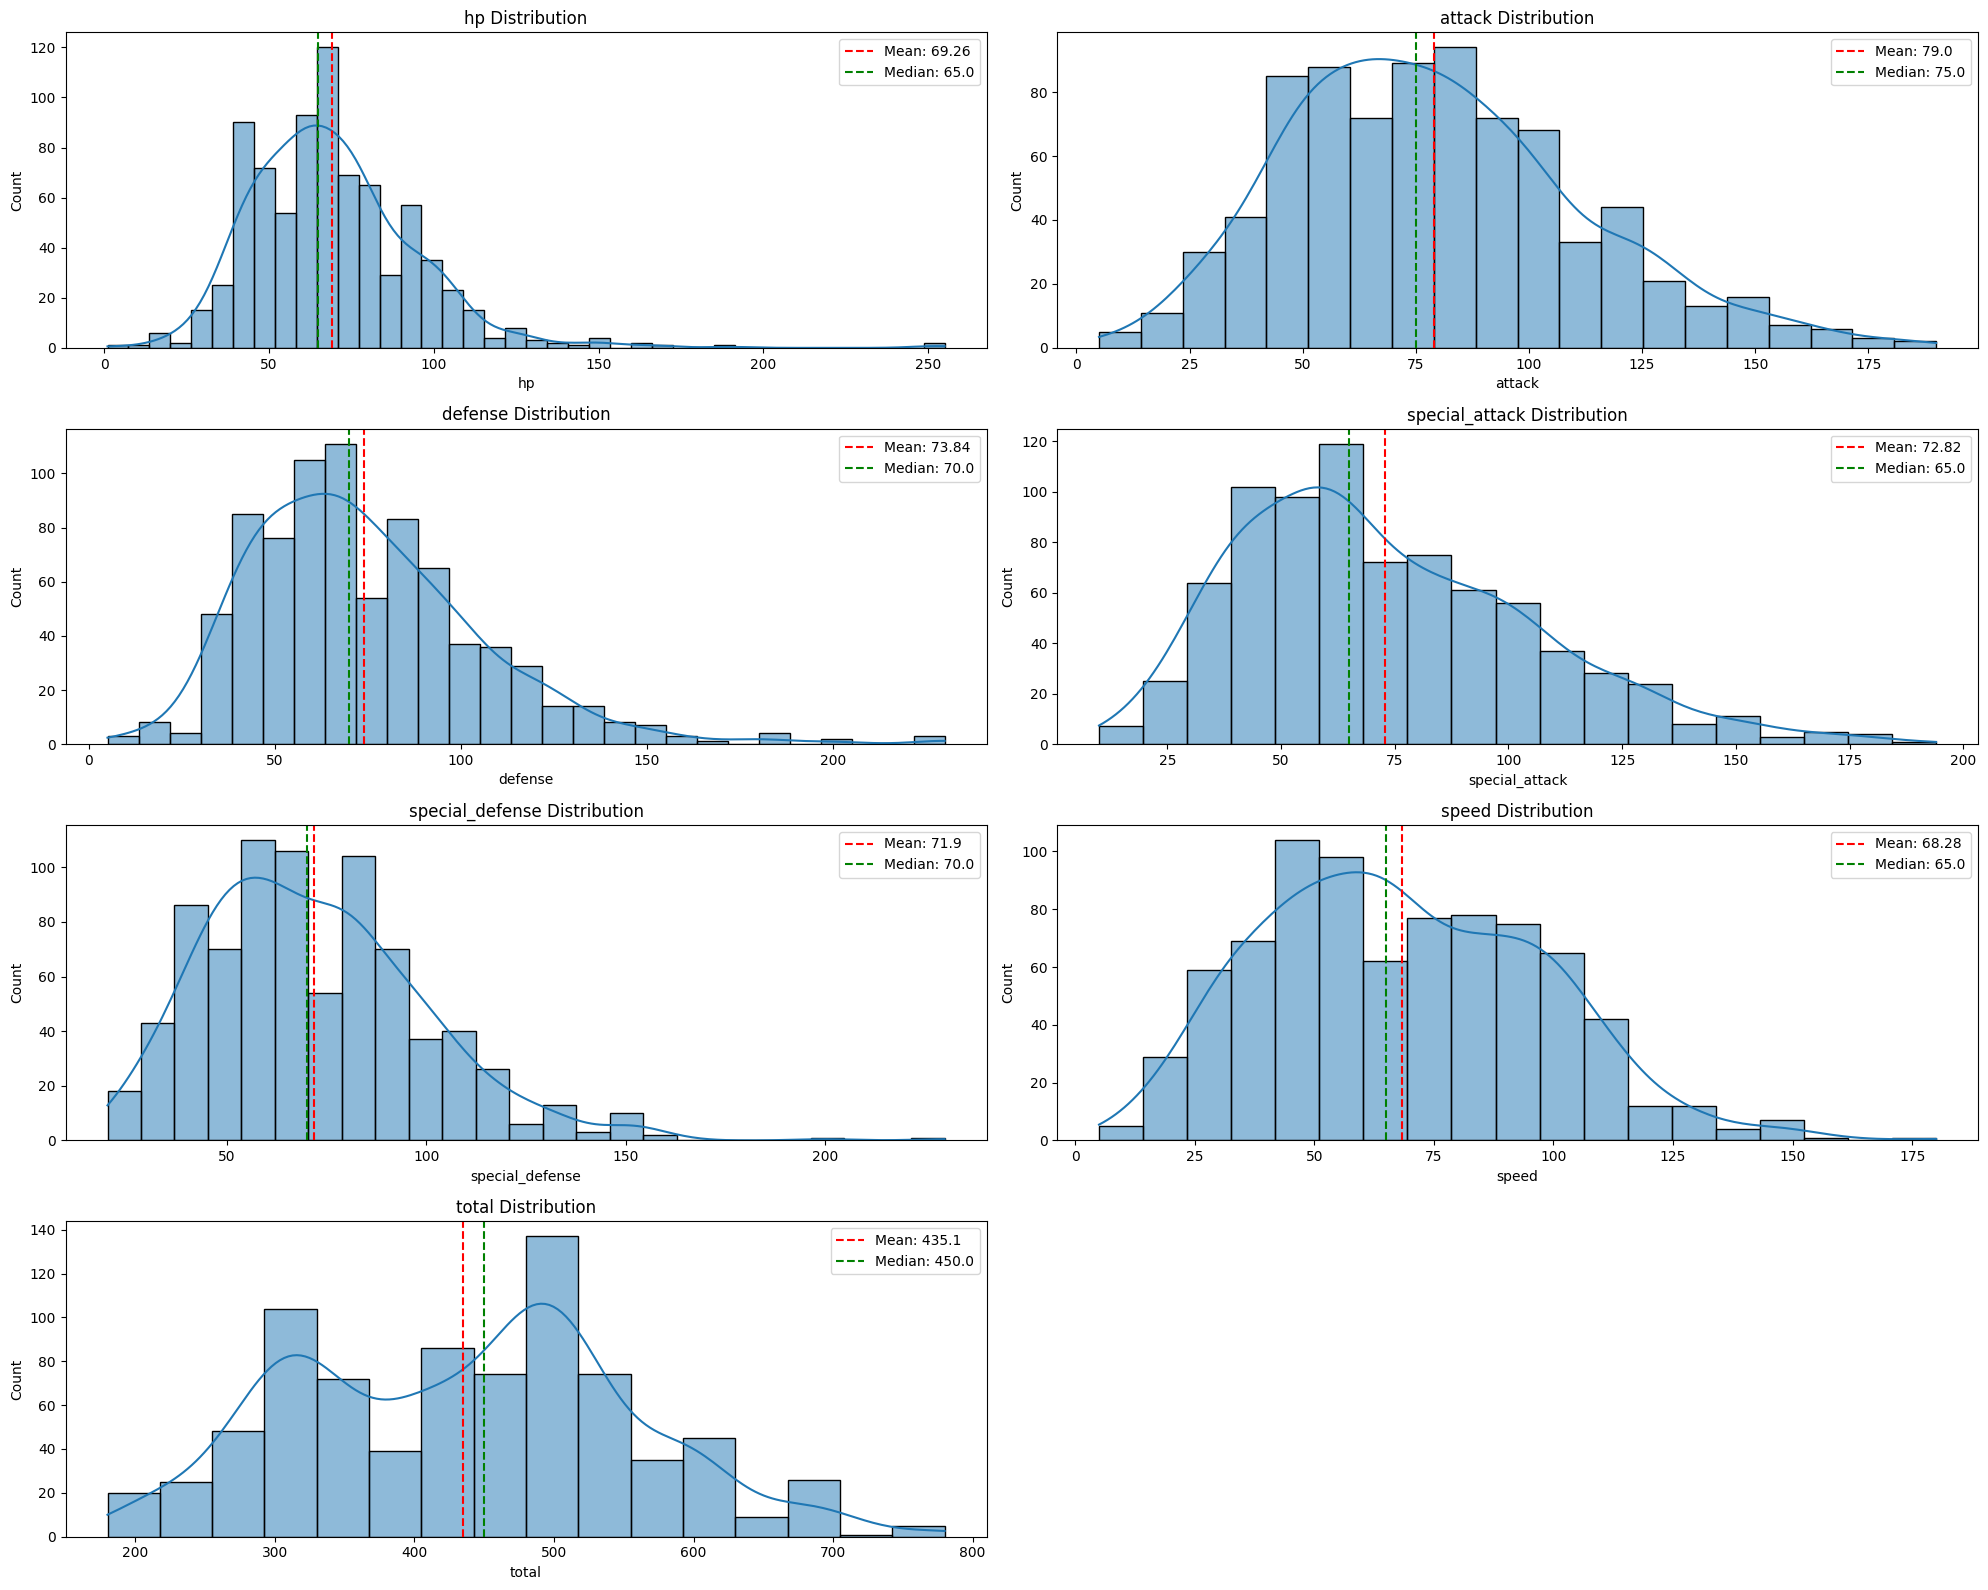

In [18]:
def plot_histogram(dataframe, features, n_cols, statistic=False):
    n_rows = (len(features) - 1) // n_cols + 1

    fig, axs = plt.subplots(n_rows, n_cols, figsize = (20, 16))
    axs = axs.flatten()

    for n, feature in enumerate(features):
        ax = sns.histplot(dataframe[feature],
                          kde=True,
                          ax=axs[n])
        if statistic:
            ax.axvline(np.mean(dataframe[feature]), ls='--', c='r',
                       label=f"Mean: {np.mean(dataframe[feature]).round(2)}")
            ax.axvline(np.median(dataframe[feature]), ls='--', c='g',
                       label=f"Median: {np.median(dataframe[feature]).round(2)}")
            ax.legend()
        ax.set_title(f'{feature} Distribution')

    if not axs.flat[-1].lines:
        axs.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_histogram(df, skills, 2, True)

<a name="section-v-five"></a>
### **Pie Chart of Generation**

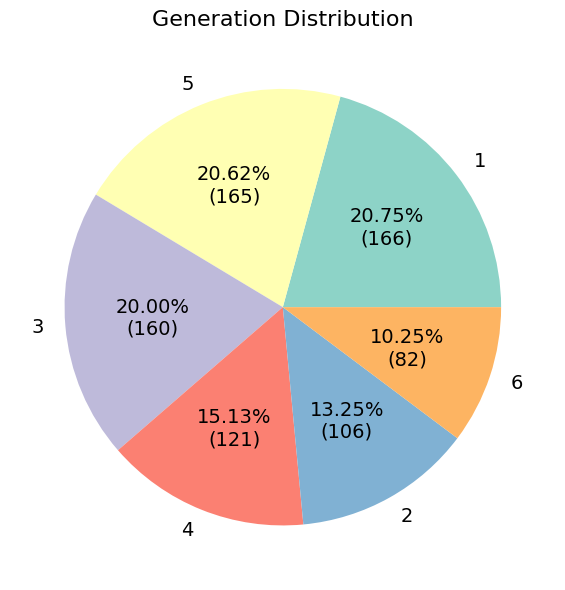

In [20]:

plot_pie(df, 'generation', 'Generation Distribution', colors=sns.color_palette('Set3'))

<a name="section-v-six"></a>
### **Pokemon Stats**

In [21]:
skills = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

def pokemon_stats(name):
    x = df[df["name"] == name]

    data = go.Scatterpolar(r = df.loc[x.index[0], skills].values,
                           theta = skills,
                           fill = 'toself',
                           line =  dict(color = 'dodgerblue'),
                           name = name)

    layout = go.Layout(polar = dict(radialaxis = dict(visible = False,
                                                      range = [0, x[skills].max().max()+20])),
                       showlegend = True,
                       title = f"{name} Stats",
                       title_x = 0.5)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

pokemon_stats("MewtwoMega Mewtwo X")

<a name="section-v-seven"></a>
### **Comparing Two Pokemon Stats**

In [22]:
skills = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

def compare_pokemons(first_name, second_name):
    x = df[df["name"] == first_name]
    y = df[df["name"] == second_name]

    trace0 = go.Scatterpolar(r = df.loc[x.index[0], skills].values,
                             theta = skills,
                             fill = 'toself',
                             line =  dict(color = '#92D1B3'),
                             name = first_name)

    trace1 = go.Scatterpolar(r = df.loc[y.index[0], skills].values,
                             theta = skills,
                             fill = 'toself',
                             line =  dict(color = 'orange'),
                             name = second_name)

    data = [trace0, trace1]

    layout = go.Layout(polar = dict(radialaxis = dict(visible = False,
                                                      range = [0, pd.concat([x,y])[skills].max().max()+10])),
                       showlegend = True,
                       title = f"{first_name} vs {second_name}",
                       title_x = 0.5)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

compare_pokemons("Bulbasaur", "Charmander")

<a name="section-v-eight"></a>
### **Type 1 and Type 2 Heatmap**

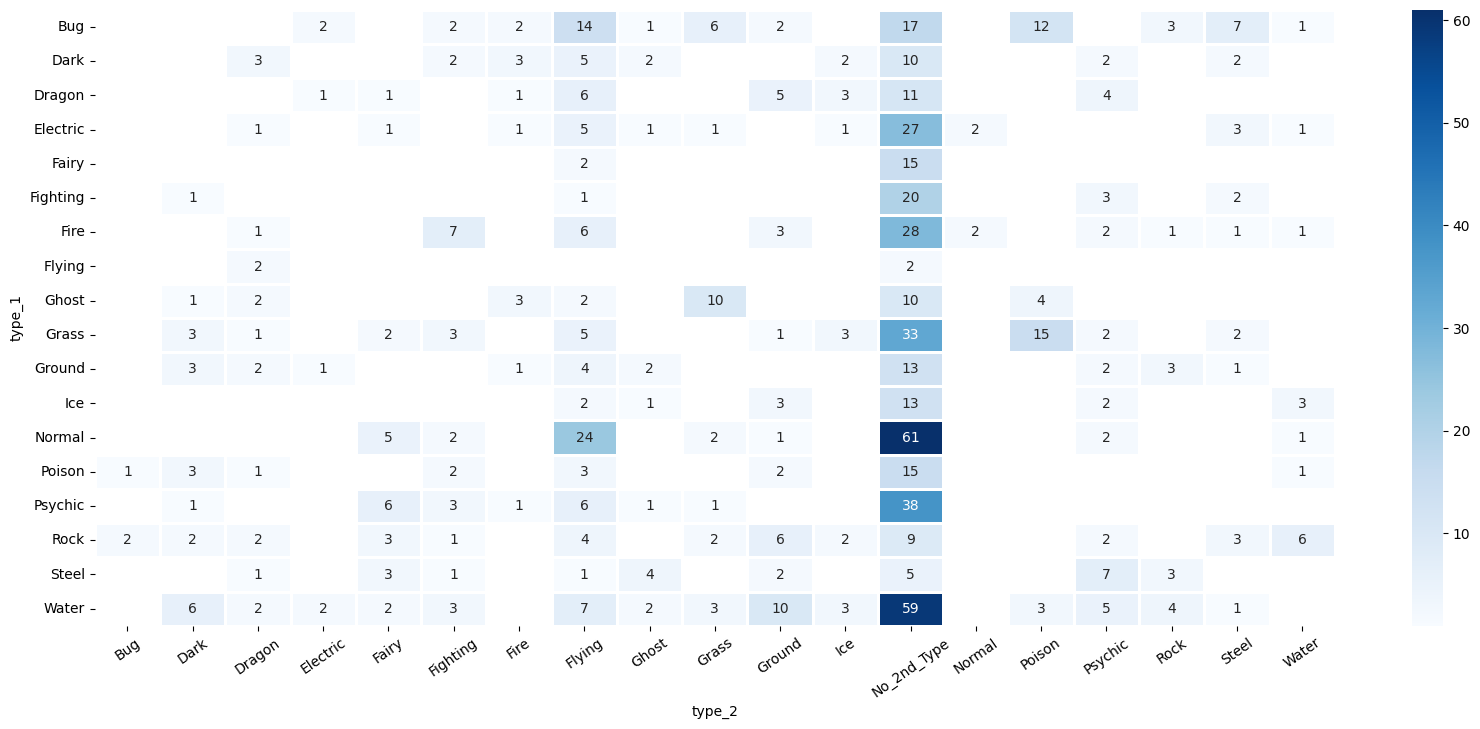

In [23]:
plt.subplots(figsize=(20, 8))

sns.heatmap(df.groupby(['type_1', 'type_2']).size().unstack(),
            linewidths=1,
            annot=True,
            cmap="Blues")

plt.xticks(rotation=35)
plt.show()

<a name="section-v-nine"></a>
### **Pairplot**

In [24]:
df

,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary,is_dual_type,full_type
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,Grass - Poison
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,Grass - Poison
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,Grass - Poison
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,Grass - Poison
4,Charmander,Fire,No_2nd_Type,309,39,52,43,60,50,65,1,False,0,Fire - No_2nd_Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1,Rock - Fairy
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1,Rock - Fairy
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1,Psychic - Ghost
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1,Psychic - Dark


In [25]:
import plotly.figure_factory as ff

hist_data = [df['attack'],df['defense']]
group_labels = ['attack','defense']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of attack and defense')

In [26]:
t = go.Scatter3d(
    x=df["speed"],
    y=df["attack"],
    z=df["defense"],
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=1
    )
)
data = [t]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    xaxis=dict(title="Speed"),
    yaxis=dict(title="Attack"),
    title = "Speed vs Attack vs Defense"
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter')

In [31]:
df

,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary,is_dual_type,full_type
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,Grass - Poison
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,Grass - Poison
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,Grass - Poison
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,Grass - Poison
4,Charmander,Fire,No_2nd_Type,309,39,52,43,60,50,65,1,False,0,Fire - No_2nd_Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1,Rock - Fairy
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1,Rock - Fairy
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1,Psychic - Ghost
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1,Psychic - Dark


In [42]:
def checkpokemonperformance(x):
    x = df[df["name"] == x]
    data = (
      {"label": "hp", "sublabel": x["hp"].values[0],
       "range": [int(max(df["hp"])*0.5), int(max(df["hp"])*0.75), int(max(df["hp"]))], "performance": [int(max(df["hp"])*0.55),int(max(df["hp"])*0.70)], "point": [x["hp"].values[0]]},
      {"label": "attack", "sublabel": x["attack"].values[0],
       "range": [int(max(df["attack"])*0.5), int(max(df["attack"])*0.75), int(max(df["attack"]))], "performance": [int(max(df["attack"])*0.55),int(max(df["attack"])*0.70)], "point": [x["attack"].values[0]]},
      {"label": "defense", "sublabel": x["defense"].values[0],
       "range": [int(max(df["defense"])*0.5), int(max(df["defense"])*0.75), int(max(df["defense"]))], "performance": [int(max(df["defense"])*0.55),int(max(df["defense"])*0.70)], "point": [x["defense"].values[0]]},
      {"label": "special_attack", "sublabel": x["special_attack"].values[0],
       "range": [int(max(df["special_attack"])*0.5), int(max(df["special_attack"])*0.75), int(max(df["special_attack"]))], "performance": [int(max(df["special_attack"])*0.55),int(max(df["special_attack"])*0.70)], "point": [x["special_attack"].values[0]]},
      {"label": "special_defense", "sublabel": x["special_defense"].values[0],
       "range": [int(max(df["special_defense"])*0.5), int(max(df["special_defense"])*0.75), int(max(df["special_defense"]))], "performance": [int(max(df["special_defense"])*0.55),int(max(df["special_defense"])*0.70)], "point": [x["special_defense"].values[0]]},
      {"label": "speed", "sublabel": x["speed"].values[0],
       "range": [int(max(df["speed"])*0.5), int(max(df["speed"])*0.75), int(max(df["speed"]))], "performance": [int(max(df["speed"])*0.55),int(max(df["speed"])*0.70)], "point": [x["speed"].values[0]]}
    )
    
    fig = ff.create_bullet(
        data, titles='label', subtitles='sublabel', markers='point',
        measures='performance', ranges='range', orientation='v', width=800, height=800
    )

    iplot(fig, filename=f'bullet chart - skills and performance of {x["name"].values[0]}')

checkpokemonperformance("VenusaurMega Venusaur")

<a name="section-v-ten"></a>
### **Correlation Matrix**

In [ ]:
plt.figure(figsize=(20,8))
corr_mx = df.corr(numeric_only=True)
mask = np.triu(corr_mx)
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="RdBu_r",
            mask=mask,
            annot=True)
plt.title("Correlation Matrix")
plt.tight_layout()